Starting AHP Method...

----------------------------------------
Processing Criteria Matrix:
Criteria Weights: [0.58522727 0.16436688 0.18425325 0.0661526 ]
Consistency Ratio (CR): 0.021
----------------------------------------
----------------------------------------
Processing Alternatives for Criterion 1:
Alternative Weights: [0.54848485 0.21060606 0.24090909]
Consistency Ratio (CR): 0.016
----------------------------------------
----------------------------------------
Processing Alternatives for Criterion 2:
Alternative Weights: [0.74816441 0.18040211 0.07143347]
Consistency Ratio (CR): 0.025
----------------------------------------
----------------------------------------
Processing Alternatives for Criterion 3:
Alternative Weights: [0.7671024  0.14291939 0.08997821]
Consistency Ratio (CR): 0.047
----------------------------------------
----------------------------------------
Processing Alternatives for Criterion 4:
Alternative Weights: [0.27371757 0.63933452 0.08694791]
Consist

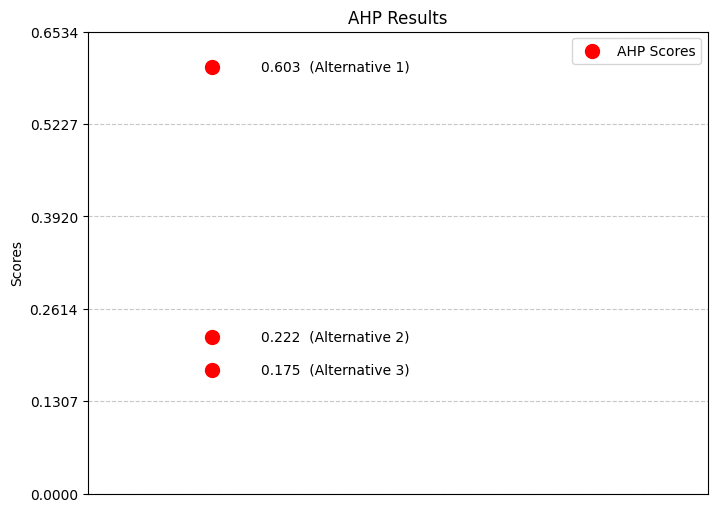

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_matrix(matrix):
    """
    Normalize a pairwise comparison matrix.

    Args:
        matrix (numpy.ndarray): Pairwise comparison matrix.

    Returns:
        numpy.ndarray: Normalized matrix where each column sums to 1.
    """
    column_sum = np.sum(matrix, axis=0)  # Sum of each column
    normalized = matrix / column_sum  # Normalize by dividing each element by column sum
    return normalized

def calculate_weights(normalized_matrix):
    """
    Calculate priority weights from a normalized matrix.

    Args:
        normalized_matrix (numpy.ndarray): Normalized matrix.

    Returns:
        numpy.ndarray: Priority vector (weights).
    """
    return np.mean(normalized_matrix, axis=1)  # Average of rows to compute weights

def consistency_ratio(matrix, weights):
    """
    Calculate the consistency ratio (CR) of a pairwise comparison matrix.

    Args:
        matrix (numpy.ndarray): Pairwise comparison matrix.
        weights (numpy.ndarray): Priority vector (weights).

    Returns:
        float: Consistency ratio (CR).
    """
    n = len(matrix)  # Size of the matrix
    weighted_sum = np.dot(matrix, weights)  # Weighted sum
    lambda_max = np.mean(weighted_sum / weights)  # Maximum eigenvalue
    CI = (lambda_max - n) / (n - 1)  # Consistency Index

    # Random Index (RI) for matrix sizes 1 to 10
    RI_table = {1: 0.0, 2: 0.0, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45, 10: 1.49}
    RI = RI_table.get(n, 1.12)  # Get RI for the current matrix size
    CR = CI / RI if RI else 0  # Consistency Ratio
    return CR

def plot_scores(scores):
    """
    Plot the scores of alternatives as a bar chart.

    Args:
        scores (numpy.ndarray): The scores of the alternatives.
    """
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(1, len(scores) + 1), scores, color='skyblue')

    # Annotate each bar with the score
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                 ha='center', va='top', fontsize=10, color='black')

    plt.xlabel('Alternatives')
    plt.ylabel('Scores')
    plt.title('AHP Scores of Alternatives')
    plt.xticks(range(1, len(scores) + 1))
    plt.show()

def plot_scatter_scores(scores):
    """
    Plot the scores of alternatives as a vertical scatter plot with scores labeled.

    Args:
        scores (numpy.ndarray): The scores of the alternatives.
    """
    alternatives = range(1, len(scores) + 1)  # Alternative indices

    plt.figure(figsize=(8, 6))

    # Scatter plot with all x values fixed at 1
    plt.scatter([1] * len(scores), scores, color='red', s=100, label="AHP Scores")

    # Annotate each point with its score and alternative index
    for i, score in enumerate(scores):
        plt.text(1.02, score, f"{score:.3f}  (Alternative {i+1})",
                 fontsize=10, va='center', ha='left', color='black')

    plt.title("AHP Results")
    plt.xlabel("")
    plt.ylabel("Scores")
    plt.xticks([])  # Remove x-ticks as all points are on x=1
    plt.yticks(np.linspace(0, max(scores) + 0.05, num=6))  # Add y-ticks for clarity
    plt.xlim(0.95, 1.2)  # Set x-axis range to add space for annotations
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Gridlines on y-axis
    plt.legend()
    plt.show()

def ahp(alternative_matrices, criteria_matrix, verbose=True, plot=True, plot_type='bar'):
    """
    Perform the AHP analysis, including criteria processing and alternatives ranking.

    Args:
        alternative_matrices (list): List of pairwise comparison matrices for each criterion.
        criteria_matrix (numpy.ndarray): Pairwise comparison matrix for criteria.
        verbose (bool): Whether to display intermediate results.
        plot (bool): Whether to plot the final scores.
        plot_type (str): Type of plot ('bar' for bar chart, 'scatter' for scatter plot).

    Raises:
        ValueError: If any matrix is inconsistent.
    """
    # Step 1: Process Criteria Matrix
    normalized_criteria = normalize_matrix(criteria_matrix)
    criteria_weights = calculate_weights(normalized_criteria)
    CR_criteria = consistency_ratio(criteria_matrix, criteria_weights)

    if verbose:
        print("Starting AHP Method...\n")
        print(f"{'-'*40}")
        print("Processing Criteria Matrix:")
        print(f"Criteria Weights: {criteria_weights}")
        print(f"Consistency Ratio (CR): {CR_criteria:.3f}")
        print(f"{'-'*40}")

    if CR_criteria >= 0.1:
        raise ValueError("Criteria matrix is inconsistent. Revise judgments.")

    # Step 2: Process Alternatives Matrices
    alternative_weights_list = []
    for i, matrix in enumerate(alternative_matrices):
        normalized_matrix = normalize_matrix(matrix)
        weights = calculate_weights(normalized_matrix)
        CR = consistency_ratio(matrix, weights)

        if verbose:
            print(f"{'-'*40}")
            print(f"Processing Alternatives for Criterion {i + 1}:")
            print(f"Alternative Weights: {weights}")
            print(f"Consistency Ratio (CR): {CR:.3f}")
            print(f"{'-'*40}")

        if CR >= 0.1:
            raise ValueError(f"Matrix for Criterion {i + 1} is inconsistent. Revise judgments.")

        alternative_weights_list.append(weights)

    # Step 3: Combine Criteria and Alternatives Weights
    alternative_weights = np.vstack(alternative_weights_list)
    final_scores = np.dot(criteria_weights, alternative_weights)

    # Display Final Results
    print("\n" + "="*40)
    print("\n*AHP Results:*")
    print("\nFinal Scores for Alternatives:")
    for i, score in enumerate(final_scores):
        print(f"Alternative {i + 1}: {score:.3f}")

    # Rank Alternatives
    ranking = np.argsort(-final_scores)
    print("\nFinal Ranking of Alternatives:", ranking+1)
    print("\n" + "="*40)
    print()

    # Plot Results
    if plot:
        if plot_type == 'bar':
            plot_scores(final_scores)
        elif plot_type == 'scatter':
            plot_scatter_scores(final_scores)
        else:
            print("Invalid plot type. Use 'bar' or 'scatter'.")

# Example Usage:

# Pairwise comparison matrix for criteria
criteria_matrix = np.array([
    [1, 5, 3, 7],
    [1/5, 1, 1, 3],
    [1/3, 1, 1, 3],
    [1/7, 1/3, 1/3, 1]
])

# Alternative pairwise comparison matrices for each criterion
age_matrix = np.array([
    [1, 3, 2],
    [1/3, 1, 1],
    [1/2, 1, 1]
])

articles_matrix = np.array([
    [1, 5, 9],
    [1/5, 1, 3],
    [1/9, 1/3, 1]
])

experience_matrix = np.array([
    [1, 7, 7],
    [1/7, 1, 2],
    [1/7, 1/2, 1]
])

teaching_matrix = np.array([
    [1, 1/3, 4],
    [3, 1, 6],
    [1/4, 1/6, 1]
])

# Combine all alternative matrices into a list
alternative_matrices = [age_matrix, articles_matrix, experience_matrix, teaching_matrix]

# Run AHP Function with scatter plot
ahp(alternative_matrices, criteria_matrix, verbose=True, plot=True, plot_type='scatter')